Loading Data

In [1]:
import os

import sktime
from sktime.datasets import load_from_tsfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



# load data from .csv using pd
def load_data(path):

    # load data from .csv
    data = pd.read_csv(path, header=None)

    # get labels
    y = data.iloc[:, -1].values

    # get features
    X = data.iloc[:, :-1].values

    # return features and labels
    return X, y

Loading PTBDB DATA

In [2]:
# load ptbdb data 
ptbdb_normal_x, ptbdb_normal_y = load_data(
    "./datasets/ecg/ptbdb_normal.csv"
)

ptbdb_abnormal_x, ptbdb_abnormal_y = load_data(
    "./datasets/ecg/ptbdb_abnormal.csv"
)

# merge the data and labels
x_ptbdb = np.concatenate((ptbdb_normal_x, ptbdb_abnormal_x))
y_ptbdb = np.concatenate((ptbdb_normal_y, ptbdb_abnormal_y))

# split the data into train and test using 
train_x_ptbdb, test_x_ptbdb, train_y_ptbdb, test_y_ptbdb = train_test_split(x_ptbdb, y_ptbdb, test_size=0.33, random_state=42)



PTBDB DATA VISUALIZATION

<Axes: title={'center': 'Train data ptbdb'}>

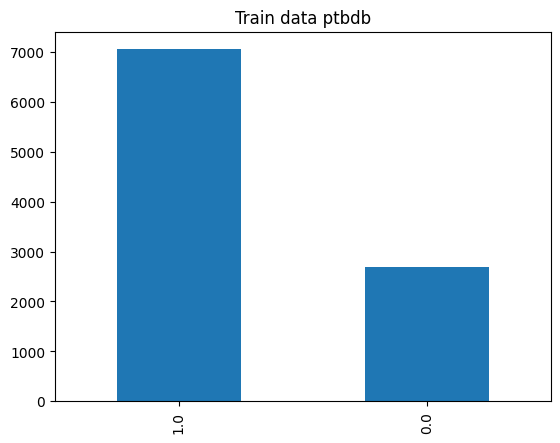

In [3]:
# Train data ptbdb

# create a dataframe from the data and labels 
df_train_ptbdb = pd.DataFrame(train_x_ptbdb)
df_train_ptbdb['label'] = train_y_ptbdb

# create a plot bar from the dataframe using pandas.plot.bar
df_train_ptbdb['label'].value_counts().plot.bar(title = "Train data ptbdb")


<Axes: title={'center': 'Test data ptbdb'}>

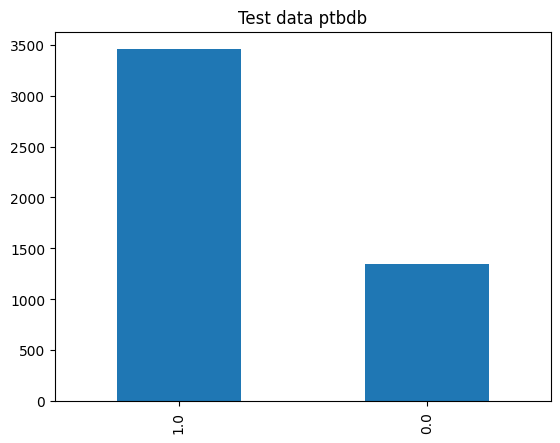

In [4]:
# Test data ptbdb

# create a dataframe from the data and labels 
df_test_ptbdb = pd.DataFrame(test_x_ptbdb)
df_test_ptbdb['label'] = test_y_ptbdb

# create a plot bar from the dataframe using pandas.plot.bar
df_test_ptbdb['label'].value_counts().plot.bar(title = "Test data ptbdb")


<Axes: title={'center': 'Train and Test data ptbdb'}>

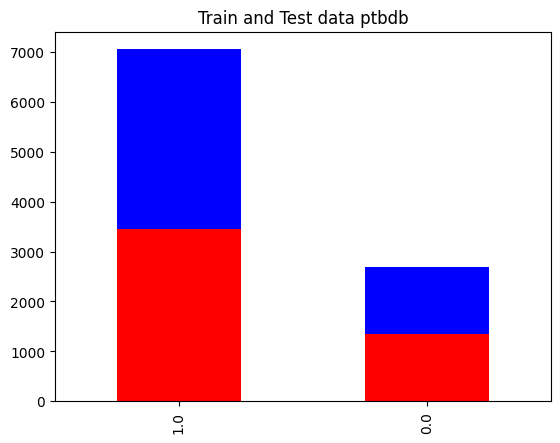

In [5]:
# put test_df and train_df on the same plot bar with different colors 
df_train_ptbdb['label'].value_counts().plot.bar(title = "Train and Test data ptbdb", color = 'blue', alpha = 1)
df_test_ptbdb['label'].value_counts().plot.bar(color = 'red', alpha = 1)

In [6]:
ptbdb_labels = df_train_ptbdb['label'].unique()
counts_train = df_train_ptbdb['label'].value_counts()
counts_test= df_test_ptbdb['label'].value_counts()


print("----------------------------------")
print("TRAIN: "+  str(counts_train))
print("----------------------------------")
print("TEST: " + str(counts_test))

----------------------------------
TRAIN: 1.0    7052
0.0    2697
Name: label, dtype: int64
----------------------------------
TEST: 1.0    3454
0.0    1349
Name: label, dtype: int64


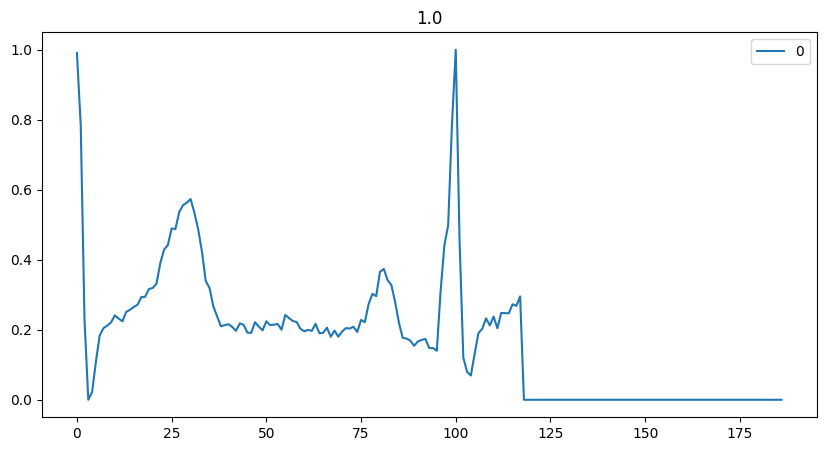

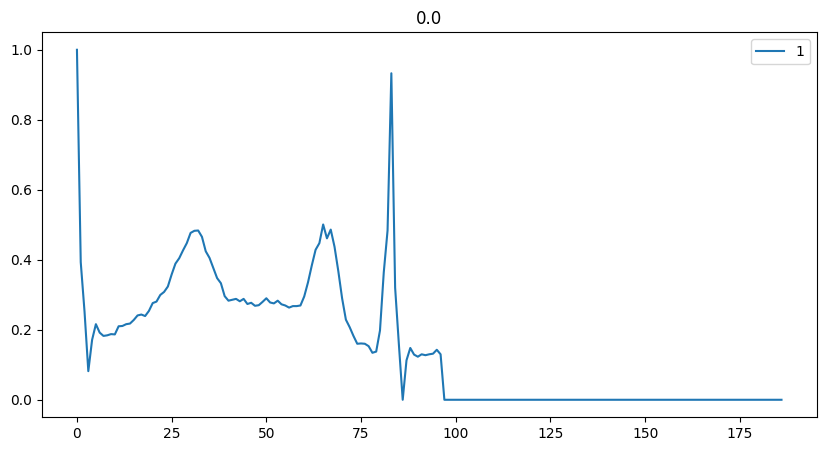

In [7]:
# for each label, plot the data#
for label in ptbdb_labels:
    current = df_train_ptbdb[df_train_ptbdb['label'] == label].iloc[0]

    # create a dataframe from the data and labels
    current_df = pd.DataFrame(current)
    current_df = current_df.drop('label', axis = 0)
    current_df.plot(title = str(label), figsize = (10, 5))
    

MEDIA SI DEVIATIA STANDARD PER UNITATE DE TIMP

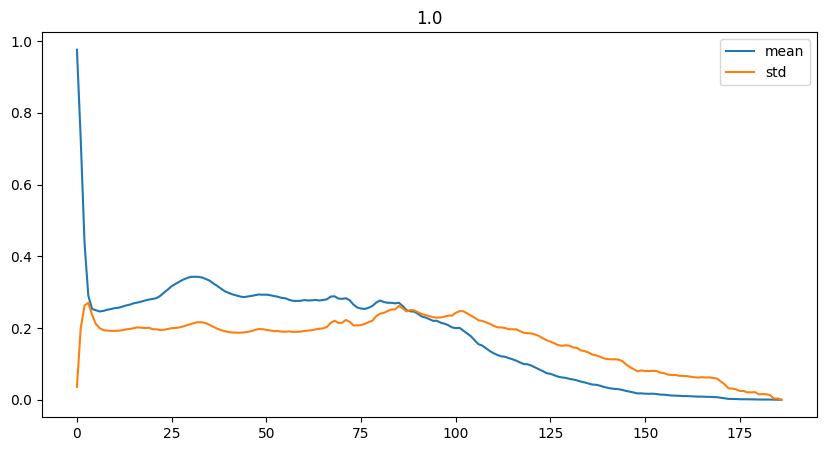

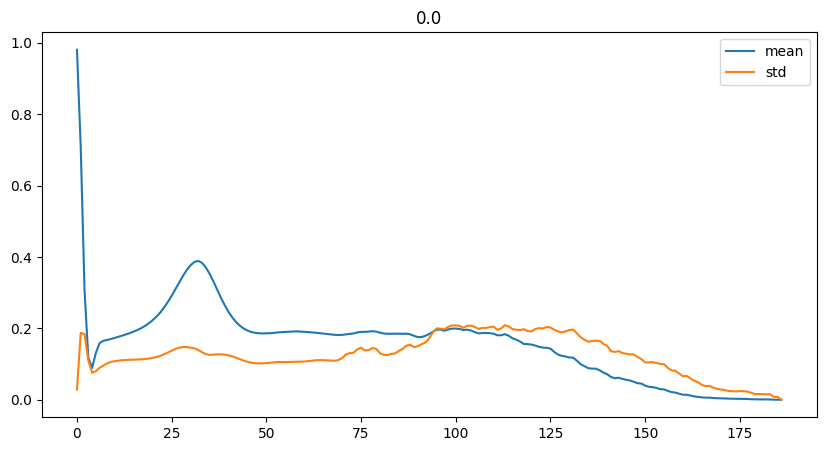

In [8]:
# Media si deviatia standard pt fiecare label pt mitbih
from matplotlib import pyplot as plt


for label in ptbdb_labels:
    current = df_train_ptbdb[df_train_ptbdb['label'] == label]

    # create a dataframe from the data and labels
    current_df = pd.DataFrame(current)
    current_df = current_df.drop('label', axis = 1)
    current_df_mean = current_df.mean()
    current_df_std = current_df.std()
    current_df_mean.plot(title = str(label), figsize = (10, 5))
    current_df_std.plot(title = str(label), figsize = (10, 5))

    # end plot
    plt.legend(['mean', 'std'])
    plt.show()

    

3.2.2. Extragerea atributelor

In [9]:
# Setam atributele default date de intrare PTBDB pentru train
X_train_std_ptbdb = pd.DataFrame(train_x_ptbdb)

X_train_std_ptbdb

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.990927,0.783539,0.227479,0.000000,0.022035,0.108231,0.183409,0.204796,0.211925,0.220998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.393287,0.252151,0.081756,0.171256,0.216007,0.191911,0.182444,0.184165,0.187608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.985700,0.698718,0.277120,0.073471,0.112426,0.117850,0.104536,0.097633,0.101578,0.113905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.975400,0.486470,0.260148,0.239237,0.169127,0.033825,0.057196,0.033210,0.041820,0.042435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.731910,0.255042,0.056940,0.097272,0.236062,0.307236,0.283511,0.294187,0.281139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,1.000000,0.981721,0.792460,0.559025,0.366717,0.238385,0.129474,0.089109,0.081493,0.085301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9745,0.962754,0.435666,0.000000,0.095937,0.306998,0.537246,0.586907,0.602709,0.601580,0.606095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9746,0.932432,1.000000,0.879505,0.563063,0.347973,0.273649,0.181306,0.225225,0.373874,0.367117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9747,0.961121,0.524864,0.051537,0.000452,0.000000,0.089964,0.147378,0.146022,0.153255,0.158228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Setam atributele default date de intrare PTBDB pentru test
X_test_std_ptbdb = pd.DataFrame(test_x_ptbdb)

X_test_std_ptbdb

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.866995,0.282841,0.059934,0.083333,0.153941,0.146141,0.134647,0.135057,0.128489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.983679,0.655367,0.492153,0.052731,0.003139,0.106717,0.133082,0.180791,0.213434,0.213434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.888675,1.000000,0.863636,0.644838,0.430663,0.279276,0.145994,0.083205,0.063945,0.070878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.993166,0.860289,0.712225,0.870159,0.760820,0.652240,0.671982,0.640850,0.675019,0.642369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.707952,0.417312,0.173821,0.279381,0.294863,0.218156,0.162562,0.149894,0.154821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.994378,0.958855,0.216458,0.066190,0.000000,0.070790,0.102479,0.153846,0.190135,0.208025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.914253,0.958546,0.528109,0.196479,0.063600,0.105054,0.089722,0.076661,0.090857,0.069279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,1.000000,0.669367,0.282032,0.084683,0.016200,0.217231,0.287187,0.290133,0.317378,0.335052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,0.950827,0.739720,0.439593,0.184824,0.000000,0.106401,0.221704,0.272573,0.285290,0.295888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Setam atributele statistice date de intrare ptbdb pentru datele de train
X_train_statistics_ptbdb = pd.DataFrame()

# Mean features
X_train_statistics_ptbdb['mean'] = X_train_std_ptbdb.mean(axis=1)

# Standard deviation features
X_train_statistics_ptbdb['std'] = X_train_std_ptbdb.std(axis=1)

# Average absolute difference features
X_train_statistics_ptbdb['avg_abs_diff'] = X_train_std_ptbdb.mad(axis=1)

# Min features
X_train_statistics_ptbdb['min'] = X_train_std_ptbdb.min(axis=1)

# Max features
X_train_statistics_ptbdb['max'] = X_train_std_ptbdb.max(axis=1)

# Max-min features
X_train_statistics_ptbdb['max-min'] = X_train_statistics_ptbdb['max'] - X_train_statistics_ptbdb['min']

# Median features
X_train_statistics_ptbdb['median'] = X_train_std_ptbdb.median(axis=1)

# Median absolute deviation features, don't use X_train_std_ptbdb.mad(axis=1) because it's the average absolute difference
# X_train_statistics_ptbdb['median_abs_dev'] = (X_train_std_ptbdb - X_train_statistics_ptbdb['median']).abs().median(axis=1)

# Interquartile range features
X_train_statistics_ptbdb['interquartile_range'] = X_train_std_ptbdb.quantile(0.75, axis=1) - X_train_std_ptbdb.quantile(0.25, axis=1)

# Values above mean features
# X_train_statistics_ptbdb['values_above_mean'] = (X_train_std_ptbdb > X_train_statistics_ptbdb['mean']).sum(axis=1)

# Number of peaks features
# X_train_statistics_ptbdb['number_of_peaks'] = (X_train_std_ptbdb.diff(axis=1) < 0).sum(axis=1)

# Skewnness features
X_train_statistics_ptbdb['skewness'] = X_train_std_ptbdb.skew(axis=1)

# Kurtosis features
X_train_statistics_ptbdb['kurtosis'] = X_train_std_ptbdb.kurtosis(axis=1)

# Energy features
X_train_statistics_ptbdb['energy'] = (X_train_std_ptbdb ** 2).sum(axis=1)

# Average of absolute values features
X_train_statistics_ptbdb['avg_abs_val'] = X_train_std_ptbdb.abs().mean(axis=1)

# Signal magnitude area features
X_train_statistics_ptbdb['signal_magnitude_area'] = X_train_std_ptbdb.abs().sum(axis=1)

# Compute FFT features
fft = np.abs(np.fft.fft(X_train_std_ptbdb))

# make fft data frame
fft = pd.DataFrame(fft)

# FFT mean features
X_train_statistics_ptbdb['fft_mean'] = fft.mean(axis=1)

# FFT standard deviation features
X_train_statistics_ptbdb['fft_std'] = fft.std(axis=1)

# FFT average absolute difference features
X_train_statistics_ptbdb['fft_avg_abs_diff'] = fft.mad(axis=1)

# FFT min features
X_train_statistics_ptbdb['fft_min'] = fft.min(axis=1)

# FFT max features
X_train_statistics_ptbdb['fft_max'] = fft.max(axis=1)

# FFT max-min features
X_train_statistics_ptbdb['fft_max-min'] = X_train_statistics_ptbdb['fft_max'] - X_train_statistics_ptbdb['fft_min']

# FFT median features
X_train_statistics_ptbdb['fft_median'] = fft.median(axis=1)

# FFT median absolute deviation features, don't use fft.mad(axis=1) because it's the average absolute difference
# X_train_statistics_ptbdb['fft_median_abs_dev'] = (fft - X_train_statistics_ptbdb['fft_median']).abs().median(axis=1)

# FFT interquartile range features
X_train_statistics_ptbdb['fft_interquartile_range'] = fft.quantile(0.75, axis=1) - fft.quantile(0.25, axis=1)

# FFT values above mean features
# X_train_statistics_ptbdb['fft_values_above_mean'] = (fft > X_train_statistics_ptbdb['fft_mean']).sum(axis=1)

# FFT number of peaks features
# X_train_statistics_ptbdb['fft_number_of_peaks'] = (fft.diff(axis=1) < 0).sum(axis=1)

# FFT skewnness features
X_train_statistics_ptbdb['fft_skewness'] = fft.skew(axis=1)

# FFT kurtosis features
X_train_statistics_ptbdb['fft_kurtosis'] = fft.kurtosis(axis=1)

# FFT energy features
X_train_statistics_ptbdb['fft_energy'] = (fft ** 2).sum(axis=1)

# FFT average of absolute values features
X_train_statistics_ptbdb['fft_avg_abs_val'] = fft.abs().mean(axis=1)

# FFT signal magnitude area features
X_train_statistics_ptbdb['fft_signal_magnitude_area'] = fft.abs().sum(axis=1)

X_train_statistics_ptbdb

C:\Users\andre\AppData\Local\Temp\ipykernel_2724\2431980457.py:11: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  X_train_statistics_ptbdb['avg_abs_diff'] = X_train_std_ptbdb.mad(axis=1)
C:\Users\andre\AppData\Local\Temp\ipykernel_2724\2431980457.py:65: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  X_train_statistics_ptbdb['fft_avg_abs_diff'] = fft.mad(axis=1)


,mean,std,avg_abs_diff,min,max,max-min,median,interquartile_range,skewness,kurtosis,...,fft_min,fft_max,fft_max-min,fft_median,fft_interquartile_range,fft_skewness,fft_kurtosis,fft_energy,fft_avg_abs_val,fft_signal_magnitude_area
0,0.174228,0.184133,0.137257,0.0,1.0,1.0,0.191834,0.241737,1.526791,3.872036,...,0.114355,32.580687,32.466332,1.039547,1.527668,7.039242,65.268401,2240.786165,1.800888,336.765966
1,0.149539,0.179103,0.148596,0.0,1.0,1.0,0.123064,0.275818,1.359416,3.013756,...,0.208496,27.963855,27.755360,1.056171,0.982650,7.230464,58.680963,1897.710616,1.595410,298.341602
2,0.101789,0.161667,0.110950,0.0,1.0,1.0,0.000000,0.146696,2.811919,10.751445,...,0.221421,19.034517,18.813096,0.865009,1.570778,5.021344,34.085509,1271.380243,1.596825,298.606218
3,0.081720,0.133777,0.070594,0.0,1.0,1.0,0.054736,0.077491,4.468964,24.897907,...,0.163795,15.281673,15.117878,1.013749,0.863464,4.597141,33.059956,855.998267,1.463926,273.754069
4,0.144182,0.175031,0.138477,0.0,1.0,1.0,0.115065,0.223606,1.626920,3.793160,...,0.261235,26.962040,26.700805,1.016890,1.213968,6.259829,51.401471,1792.526665,1.670917,312.461453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,0.110125,0.181344,0.112300,0.0,1.0,1.0,0.055979,0.155941,3.096683,10.778524,...,0.363160,20.593298,20.230137,0.759545,1.379027,4.024041,24.108656,1567.907420,1.722481,322.103951
9745,0.256666,0.343189,0.322895,0.0,1.0,1.0,0.000000,0.636569,0.686096,-1.336919,...,0.231670,47.996614,47.764944,1.038283,1.088419,6.541262,46.502303,6400.261978,2.288347,427.920855
9746,0.196861,0.231389,0.190570,0.0,1.0,1.0,0.152027,0.335586,1.272991,1.725854,...,0.066324,36.813063,36.746739,0.756450,1.560214,6.320847,50.504969,3217.462661,1.947767,364.232464
9747,0.182207,0.158330,0.099579,0.0,1.0,1.0,0.160940,0.090868,2.209752,8.225151,...,0.070388,34.072785,34.002397,1.034964,1.642241,8.726847,95.922221,2032.884661,1.738592,325.116704


In [12]:
# Setam atributele statistice date de intrare ptbdb pentru datele de test
X_test_statistics_ptbdb = pd.DataFrame()

# Mean features
X_test_statistics_ptbdb['mean'] = X_test_std_ptbdb.mean(axis=1)

# Standard deviation features
X_test_statistics_ptbdb['std'] = X_test_std_ptbdb.std(axis=1)

# Average absolute difference features
X_test_statistics_ptbdb['avg_abs_diff'] = X_test_std_ptbdb.mad(axis=1)

# Min features
X_test_statistics_ptbdb['min'] = X_test_std_ptbdb.min(axis=1)

# Max features
X_test_statistics_ptbdb['max'] = X_test_std_ptbdb.max(axis=1)

# Max-min features
X_test_statistics_ptbdb['max-min'] = X_test_statistics_ptbdb['max'] - X_test_statistics_ptbdb['min']

# Median features
X_test_statistics_ptbdb['median'] = X_test_std_ptbdb.median(axis=1)

# Median absolute deviation features, don't use X_test_std_ptbdb.mad(axis=1) because it's the average absolute difference
# X_test_statistics_ptbdb['median_abs_dev'] = (X_test_std_ptbdb - X_test_statistics_ptbdb['median']).abs().median(axis=1)

# Interquartile range features
X_test_statistics_ptbdb['interquartile_range'] = X_test_std_ptbdb.quantile(0.75, axis=1) - X_test_std_ptbdb.quantile(0.25, axis=1)

# Values above mean features
# X_test_statistics_ptbdb['values_above_mean'] = (X_test_std_ptbdb > X_test_statistics_ptbdb['mean']).sum(axis=1)

# Number of peaks features
# X_test_statistics_ptbdb['number_of_peaks'] = (X_test_std_ptbdb.diff(axis=1) < 0).sum(axis=1)

# Skewnness features
X_test_statistics_ptbdb['skewness'] = X_test_std_ptbdb.skew(axis=1)

# Kurtosis features
X_test_statistics_ptbdb['kurtosis'] = X_test_std_ptbdb.kurtosis(axis=1)

# Energy features
X_test_statistics_ptbdb['energy'] = (X_test_std_ptbdb ** 2).sum(axis=1)

# Average of absolute values features
X_test_statistics_ptbdb['avg_abs_val'] = X_test_std_ptbdb.abs().mean(axis=1)

# Signal magnitude area features
X_test_statistics_ptbdb['signal_magnitude_area'] = X_test_std_ptbdb.abs().sum(axis=1)

# Compute FFT features
fft = np.abs(np.fft.fft(X_test_std_ptbdb))

# make fft data frame
fft = pd.DataFrame(fft)

# FFT mean features
X_test_statistics_ptbdb['fft_mean'] = fft.mean(axis=1)

# FFT standard deviation features
X_test_statistics_ptbdb['fft_std'] = fft.std(axis=1)

# FFT average absolute difference features
X_test_statistics_ptbdb['fft_avg_abs_diff'] = fft.mad(axis=1)

# FFT min features
X_test_statistics_ptbdb['fft_min'] = fft.min(axis=1)

# FFT max features
X_test_statistics_ptbdb['fft_max'] = fft.max(axis=1)

# FFT max-min features
X_test_statistics_ptbdb['fft_max-min'] = X_test_statistics_ptbdb['fft_max'] - X_test_statistics_ptbdb['fft_min']

# FFT median features
X_test_statistics_ptbdb['fft_median'] = fft.median(axis=1)

# FFT median absolute deviation features, don't use fft.mad(axis=1) because it's the average absolute difference
# X_test_statistics_ptbdb['fft_median_abs_dev'] = (fft - X_test_statistics_ptbdb['fft_median']).abs().median(axis=1)

# FFT interquartile range features
X_test_statistics_ptbdb['fft_interquartile_range'] = fft.quantile(0.75, axis=1) - fft.quantile(0.25, axis=1)

# FFT values above mean features
# X_test_statistics_ptbdb['fft_values_above_mean'] = (fft > X_test_statistics_ptbdb['fft_mean']).sum(axis=1)

# FFT number of peaks features
# X_test_statistics_ptbdb['fft_number_of_peaks'] = (fft.diff(axis=1) < 0).sum(axis=1)

# FFT skewnness features
X_test_statistics_ptbdb['fft_skewness'] = fft.skew(axis=1)

# FFT kurtosis features
X_test_statistics_ptbdb['fft_kurtosis'] = fft.kurtosis(axis=1)

# FFT energy features
X_test_statistics_ptbdb['fft_energy'] = (fft ** 2).sum(axis=1)

# FFT average of absolute values features
X_test_statistics_ptbdb['fft_avg_abs_val'] = fft.abs().mean(axis=1)

# FFT signal magnitude area features
X_test_statistics_ptbdb['fft_signal_magnitude_area'] = fft.abs().sum(axis=1)

X_test_statistics_ptbdb

C:\Users\andre\AppData\Local\Temp\ipykernel_2724\3922335371.py:11: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  X_test_statistics_ptbdb['avg_abs_diff'] = X_test_std_ptbdb.mad(axis=1)
C:\Users\andre\AppData\Local\Temp\ipykernel_2724\3922335371.py:65: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  X_test_statistics_ptbdb['fft_avg_abs_diff'] = fft.mad(axis=1)


,mean,std,avg_abs_diff,min,max,max-min,median,interquartile_range,skewness,kurtosis,...,fft_min,fft_max,fft_max-min,fft_median,fft_interquartile_range,fft_skewness,fft_kurtosis,fft_energy,fft_avg_abs_val,fft_signal_magnitude_area
0,0.126834,0.158601,0.090149,0.0,1.0,1.0,0.106322,0.138547,3.150508,12.745910,...,0.084425,23.717980,23.633555,0.935121,1.675631,5.976580,53.634548,1437.453224,1.681797,314.496113
1,0.209745,0.174169,0.120516,0.0,1.0,1.0,0.229127,0.236974,1.458836,5.072539,...,0.215351,39.222222,39.006872,0.904587,1.513242,8.543545,92.912169,2593.493206,1.790164,334.760600
2,0.110925,0.186817,0.116954,0.0,1.0,1.0,0.046995,0.156780,3.035061,10.087206,...,0.290940,20.743066,20.452126,0.654979,1.356104,3.718640,20.849055,1644.185369,1.692689,316.532850
3,0.366458,0.335280,0.320190,0.0,1.0,1.0,0.487472,0.659833,-0.017578,-1.739626,...,0.062712,68.527714,68.465003,1.195365,1.409078,7.742653,71.174992,8605.989975,2.561301,478.963212
4,0.174209,0.167576,0.112411,0.0,1.0,1.0,0.140746,0.138987,2.094412,6.322106,...,0.292587,32.577058,32.284472,0.905837,1.489765,7.758725,79.117989,2038.007636,1.742393,325.827493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.120711,0.173608,0.136092,0.0,1.0,1.0,0.000000,0.232814,2.415380,9.118638,...,0.100254,22.572962,22.472708,1.218028,1.512434,5.999579,44.430624,1557.861719,1.667349,311.794315
4799,0.116220,0.150629,0.082425,0.0,1.0,1.0,0.088018,0.091141,3.848405,17.803512,...,0.236330,21.733106,21.496776,0.720190,1.884872,5.456927,48.824903,1261.499821,1.594470,298.165886
4800,0.278953,0.187933,0.117096,0.0,1.0,1.0,0.282032,0.052283,0.800758,2.341190,...,0.119437,52.164212,52.044775,0.941655,1.417645,9.702190,112.496871,3949.563998,1.907260,356.657546
4801,0.167539,0.200838,0.177922,0.0,1.0,1.0,0.000000,0.322594,1.111944,1.666793,...,0.053618,31.329801,31.276183,0.788518,1.195090,6.835420,54.025625,2384.525501,1.664339,311.231353


Models

In [ ]:
# SVM with standard parameters PTBDB
svm_std_parameters_ptbdb = SVC()
svm_std_parameters_ptbdb.fit(X_train_std_ptbdb, train_y_ptbdb)

# print prediction results
predictions = svm_std_parameters_ptbdb.predict(X_test_std_ptbdb)
print(classification_report(test_y_ptbdb, predictions))


             precision    recall  f1-score   support

         0.0       0.85      0.78      0.81      1349
         1.0       0.92      0.95      0.93      3454

    accuracy                           0.90      4803
   macro avg       0.88      0.86      0.87      4803
weighted avg       0.90      0.90      0.90      4803

In [35]:
# Variance Threshold
VARIANCE_THRESHOLD = 0
SELECT_PERCENTILE = 70


In [14]:
sel = VarianceThreshold(threshold=VARIANCE_THRESHOLD)

# Variance Threshold PTBDB 
X_train_variance_ptbdb = X_train_std_ptbdb.copy()
X_test_variance_ptbdb = X_test_std_ptbdb.copy()

sel.fit_transform(X_train_variance_ptbdb)
sel.fit_transform(X_test_variance_ptbdb)

# transform X_train to ndarray
X_train_variance_ptbdb = sel.transform(X_train_variance_ptbdb)
X_test_variance_ptbdb = sel.transform(X_test_variance_ptbdb)

print(X_test_variance_ptbdb.shape)

(4803, 186)


In [36]:
from sklearn.feature_selection import SelectPercentile

# Select Percentile PTBDB
X_train_percentile_ptbdb = X_train_std_ptbdb.copy()

X_test_percentile_ptbdb = X_test_std_ptbdb.copy()

# add columns name to X_test_percentile x1, x2, x3, , xn
X_test_percentile_ptbdb.columns = [f'x{i}' for i in range(1, X_test_percentile_ptbdb.shape[1] + 1)]

# add columns name to X_train_percentile x1, x2, x3, , xn
X_train_percentile_ptbdb.columns = [f'x{i}' for i in range(1, X_train_percentile_ptbdb.shape[1] + 1)]

X_train_percentile_ptbdb = SelectPercentile(percentile=SELECT_PERCENTILE).fit(X_train_percentile_ptbdb, train_y_ptbdb)

train_features_names_ptbdb = X_train_percentile_ptbdb.get_feature_names_out()

X_train_percentile_ptbdb = X_train_percentile_ptbdb.transform(X_train_std_ptbdb)

# Remove features using SelectPercentile from X_test_percentile using the same features
X_test_percentile_ptbdb = X_test_percentile_ptbdb[train_features_names_ptbdb]

print(X_train_percentile_ptbdb)


[[2.27478936e-01 0.00000000e+00 2.20349971e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.52151459e-01 8.17555934e-02 1.71256453e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.77120322e-01 7.34713972e-02 1.12426035e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.79504502e-01 5.63063085e-01 3.47972959e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.15370704e-02 4.52079577e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.35254419e-01 4.08338457e-01 2.84488052e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [186] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SelectPercentile was fitted with feature names
  warnings.warn(


In [ ]:
# SVM with standard parameters PTBDB with variance threshold
svm_std_parameters_ptbdb_variance = SVC()
svm_std_parameters_ptbdb_variance.fit(X_train_variance_ptbdb, train_y_ptbdb)

# print prediction results
predictions = svm_std_parameters_ptbdb_variance.predict(X_test_variance_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

VARIANCE 0

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81      1349
         1.0       0.92      0.95      0.93      3454

    accuracy                           0.90      4803
   macro avg       0.88      0.86      0.87      4803
weighted avg       0.90      0.90      0.90      4803

In [ ]:
# SVM with standard parameters PTBDB with percentile threshold
svm_std_parameters_ptbdb_percentile = SVC()

svm_std_parameters_ptbdb_percentile.fit(X_train_percentile_ptbdb, train_y_ptbdb)

# print prediction results
predictions = svm_std_parameters_ptbdb_percentile.predict(X_test_percentile_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

PERCENTILE 70

             precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1349
         1.0       0.92      0.94      0.93      3454

    accuracy                           0.90      4803
   macro avg       0.88      0.86      0.87      4803
weighted avg       0.90      0.90      0.90      4803


PERCENTILE 30

            precision    recall  f1-score   support

         0.0       0.80      0.60      0.68      1349
         1.0       0.86      0.94      0.90      3454

    accuracy                           0.84      4803
   macro avg       0.83      0.77      0.79      4803
weighted avg       0.84      0.84      0.84      4803

PERCENTILE 10

              precision    recall  f1-score   support

         0.0       0.74      0.44      0.55      1349
         1.0       0.81      0.94      0.87      3454

    accuracy                           0.80      4803
   macro avg       0.78      0.69      0.71      4803
weighted avg       0.79      0.80      0.78      4803

In [16]:
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 

CV = 3

In [ ]:
# SVM with GridSearchCV PTBDB with all features

svm_model_all_features_ptbdb = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=CV)

svm_model_all_features_ptbdb.fit(X_train_std_ptbdb, train_y_ptbdb)

print(svm_model_all_features_ptbdb.best_params_)

# print prediction results
predictions = svm_model_all_features_ptbdb.predict(X_test_std_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1349
         1.0       0.97      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.96      0.96      4803
weighted avg       0.97      0.97      0.97      4803



In [ ]:
# SVM with GridSearchCV PTBDB with variance threshold

svm_model_variance_ptbdb = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=CV)

svm_model_variance_ptbdb.fit(X_train_variance_ptbdb, train_y_ptbdb)

print(svm_model_variance_ptbdb.best_params_)

# print prediction results

predictions = svm_model_variance_ptbdb.predict(X_test_variance_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1349
         1.0       0.97      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.96      0.96      4803
weighted avg       0.97      0.97      0.97      4803



In [ ]:
# SVM with GridSearchCV PTBDB with percentile threshold

svm_model_percentile_ptbdb = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=CV)

svm_model_percentile_ptbdb.fit(X_train_percentile_ptbdb, train_y_ptbdb)

print(svm_model_percentile_ptbdb.best_params_)

# print prediction results

predictions = svm_model_percentile_ptbdb.predict(X_test_percentile_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

PERCENTILE 90
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

           precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1349
         1.0       0.97      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.96      0.96      4803
weighted avg       0.97      0.97      0.97      4803



PERCENTILE 70

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1349
         1.0       0.97      0.98      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.96      0.96      4803
weighted avg       0.97      0.97      0.97      4803

PERCENTILE 30

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
           precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      1349
         1.0       0.97      0.97      0.97      3454

    accuracy                           0.95      4803
   macro avg       0.94      0.94      0.94      4803
weighted avg       0.95      0.95      0.95      4803

In [ ]:
# Random Forest with standard parameters PTBDB with all features

rf_std_parameters_ptbdb = RandomForestClassifier()

rf_std_parameters_ptbdb.fit(X_train_std_ptbdb, train_y_ptbdb)

# print prediction results
predictions = rf_std_parameters_ptbdb.predict(X_test_std_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      1349
         1.0       0.97      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.95      0.96      4803
weighted avg       0.97      0.97      0.97      4803


In [ ]:
# Random Forest with standard parameters PTBDB with variance threshold

rf_std_parameters_ptbdb_variance = RandomForestClassifier()

rf_std_parameters_ptbdb_variance.fit(X_train_variance_ptbdb, train_y_ptbdb)

# print prediction results

predictions = rf_std_parameters_ptbdb_variance.predict(X_test_variance_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

  precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1349
         1.0       0.97      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.95      0.96      4803
weighted avg       0.97      0.97      0.97      4803


In [ ]:
# Random Forest with standard parameters PTBDB with percentile threshold

rf_std_parameters_ptbdb_percentile = RandomForestClassifier()

rf_std_parameters_ptbdb_percentile.fit(X_train_percentile_ptbdb, train_y_ptbdb)

# print prediction results

predictions = rf_std_parameters_ptbdb_percentile.predict(X_test_percentile_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

PERCENTILE 90

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      1349
         1.0       0.97      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.95      0.96      4803
weighted avg       0.97      0.97      0.97      4803

PERCENTILE 70

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      1349
         1.0       0.96      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.95      0.96      4803
weighted avg       0.97      0.97      0.97      4803

PERCENTILE 30

              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88      1349
         1.0       0.93      0.98      0.96      3454

    accuracy                           0.93      4803
   macro avg       0.94      0.90      0.92      4803
weighted avg       0.93      0.93      0.93      4803

In [17]:
param_grid = {'n_estimators': [100, 200, 300, 400],
                'max_features': ['sqrt', 'log2'],
                'max_depth' : [5,6,7],
                'criterion' :['gini', 'entropy']}

In [ ]:
# Random Forest with GridSearchCV PTBDB with all features

rf_model_all_features_ptbdb = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv=CV)

rf_model_all_features_ptbdb.fit(X_train_std_ptbdb, train_y_ptbdb)

print(rf_model_all_features_ptbdb.best_params_)

# print prediction results

predictions = rf_model_all_features_ptbdb.predict(X_test_std_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1349
         1.0       0.94      0.94      0.94      3454

    accuracy                           0.91      4803
   macro avg       0.89      0.89      0.89      4803
weighted avg       0.91      0.91      0.91      4803

In [ ]:
# Random Forest with GridSearchCV PTBDB with variance threshold

rf_model_variance_ptbdb = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv=CV)

rf_model_variance_ptbdb.fit(X_train_variance_ptbdb, train_y_ptbdb)

print(rf_model_variance_ptbdb.best_params_)

# print prediction results

predictions = rf_model_variance_ptbdb.predict(X_test_variance_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

In [ ]:
# Random Forest with GridSearchCV PTBDB with percentile threshold

rf_model_percentile_ptbdb = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv=CV)

rf_model_percentile_ptbdb.fit(X_train_percentile_ptbdb, train_y_ptbdb)

print(rf_model_percentile_ptbdb.best_params_)

# print prediction results

predictions = rf_model_percentile_ptbdb.predict(X_test_percentile_ptbdb)


print(classification_report(test_y_ptbdb, predictions))

PERCENTILE 90

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1349
         1.0       0.94      0.94      0.94      3454

    accuracy                           0.91      4803
   macro avg       0.89      0.89      0.89      4803
weighted avg       0.91      0.91      0.91      4803

PERCENTILE 30

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.87      0.70      0.77      1349
         1.0       0.89      0.96      0.92      3454

    accuracy                           0.89      4803
   macro avg       0.88      0.83      0.85      4803
weighted avg       0.88      0.89      0.88      4803



PERCENTILE 90

In [19]:
# Gradient Boosting with standard parameters PTBDB with all features

gbt_std_parameters_ptbdb = GradientBoostingClassifier()

gbt_std_parameters_ptbdb.fit(X_train_std_ptbdb, train_y_ptbdb)

predictions = gbt_std_parameters_ptbdb.predict(X_test_std_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1349
         1.0       0.93      0.96      0.95      3454

    accuracy                           0.92      4803
   macro avg       0.91      0.89      0.90      4803
weighted avg       0.92      0.92      0.92      4803



              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1349
         1.0       0.93      0.96      0.95      3454

    accuracy                           0.92      4803
   macro avg       0.91      0.89      0.90      4803
weighted avg       0.92      0.92      0.92      4803

In [20]:
# Gradient Boosting with standard parameters PTBDB with variance threshold

gbt_std_parameters_ptbdb_variance = GradientBoostingClassifier()

gbt_std_parameters_ptbdb_variance.fit(X_train_variance_ptbdb, train_y_ptbdb)

predictions = gbt_std_parameters_ptbdb_variance.predict(X_test_variance_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1349
         1.0       0.93      0.96      0.95      3454

    accuracy                           0.92      4803
   macro avg       0.91      0.89      0.90      4803
weighted avg       0.92      0.92      0.92      4803



             precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1349
         1.0       0.93      0.96      0.95      3454

    accuracy                           0.92      4803
   macro avg       0.91      0.89      0.90      4803
weighted avg       0.92      0.92      0.92      4803

In [27]:
# Gradient Boosting with standard parameters PTBDB with percentile threshold

gbt_std_parameters_ptbdb_percentile = GradientBoostingClassifier()

gbt_std_parameters_ptbdb_percentile.fit(X_train_percentile_ptbdb, train_y_ptbdb)

predictions = gbt_std_parameters_ptbdb_percentile.predict(X_test_percentile_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75      1349
         1.0       0.88      0.94      0.91      3454

    accuracy                           0.87      4803
   macro avg       0.85      0.81      0.83      4803
weighted avg       0.87      0.87      0.87      4803



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


PERCENTILE 90


              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1349
         1.0       0.93      0.96      0.95      3454

    accuracy                           0.92      4803
   macro avg       0.91      0.89      0.90      4803
weighted avg       0.92      0.92      0.92      4803

PERCENTILE 70

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1349
         1.0       0.93      0.95      0.94      3454

    accuracy                           0.91      4803
   macro avg       0.90      0.88      0.89      4803
weighted avg       0.91      0.91      0.91      4803

PERCENTILE 30

             precision    recall  f1-score   support

         0.0       0.82      0.69      0.75      1349
         1.0       0.88      0.94      0.91      3454

    accuracy                           0.87      4803
   macro avg       0.85      0.81      0.83      4803
weighted avg       0.87      0.87      0.87      4803

In [30]:
# Define the parameter grid for GridSearchCV for Gradient Boosting

param_grid = {'n_estimators': [100, 200, 300],
                'max_depth' : [5,6,7],
                'criterion' :['friedman_mse', 'squared_error']}

In [31]:
# Gradient Boosting with GridSearchCV PTBDB with all features'

gbt_model_all_features_ptbdb = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, cv=CV)

gbt_model_all_features_ptbdb.fit(X_train_std_ptbdb, train_y_ptbdb)

print(gbt_model_all_features_ptbdb.best_params_)

# print prediction results

predictions = gbt_model_all_features_ptbdb.predict(X_test_std_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END criterion=friedman_mse, max_depth=5, n_estimators=100;, score=0.956 total time= 1.2min
[CV 2/3] END criterion=friedman_mse, max_depth=5, n_estimators=100;, score=0.964 total time= 1.3min
[CV 3/3] END criterion=friedman_mse, max_depth=5, n_estimators=100;, score=0.957 total time= 1.3min
[CV 1/3] END criterion=friedman_mse, max_depth=5, n_estimators=200;, score=0.964 total time= 2.5min
[CV 2/3] END criterion=friedman_mse, max_depth=5, n_estimators=200;, score=0.970 total time= 2.7min
[CV 3/3] END criterion=friedman_mse, max_depth=5, n_estimators=200;, score=0.966 total time= 3.2min
[CV 1/3] END criterion=friedman_mse, max_depth=5, n_estimators=300;, score=0.970 total time= 4.3min
[CV 2/3] END criterion=friedman_mse, max_depth=5, n_estimators=300;, score=0.974 total time= 3.6min
[CV 3/3] END criterion=friedman_mse, max_depth=5, n_estimators=300;, score=0.967 total time= 3.8min
[CV 1/3] END criterion=friedman_mse, ma

{'criterion': 'squared_error', 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      1349
         1.0       0.97      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.96      0.97      4803
weighted avg       0.97      0.97      0.97      4803


In [32]:
param_grid = {'n_estimators': [100, 300],
                'max_depth' : [7],
                'criterion' :['squared_error']}

In [33]:
# Gradient Boosting with GridSearchCV PTBDB with variance threshold

gbt_model_variance_ptbdb = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, cv=CV)

gbt_model_variance_ptbdb.fit(X_train_variance_ptbdb, train_y_ptbdb)

print(gbt_model_variance_ptbdb.best_params_)

# print prediction results

predictions = gbt_model_variance_ptbdb.predict(X_test_variance_ptbdb)   

print(classification_report(test_y_ptbdb, predictions))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END criterion=squared_error, max_depth=7, n_estimators=100;, score=0.967 total time= 1.9min
[CV 2/3] END criterion=squared_error, max_depth=7, n_estimators=100;, score=0.970 total time= 2.1min
[CV 3/3] END criterion=squared_error, max_depth=7, n_estimators=100;, score=0.962 total time= 1.7min
[CV 1/3] END criterion=squared_error, max_depth=7, n_estimators=300;, score=0.971 total time= 3.9min
[CV 2/3] END criterion=squared_error, max_depth=7, n_estimators=300;, score=0.978 total time= 4.8min
[CV 3/3] END criterion=squared_error, max_depth=7, n_estimators=300;, score=0.970 total time= 4.3min
{'criterion': 'squared_error', 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1349
         1.0       0.98      0.99      0.98      3454

    accuracy                           0.98      4803
   macro avg       0.98      0.96      0.97      

{'criterion': 'squared_error', 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1349
         1.0       0.98      0.99      0.98      3454

    accuracy                           0.98      4803
   macro avg       0.98      0.96      0.97      4803
weighted avg       0.98      0.98      0.98      4803


In [37]:
# Gradient Boosting with GridSearchCV PTBDB with percentile threshold

gbt_model_percentile_ptbdb = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, cv=CV)

gbt_model_percentile_ptbdb.fit(X_train_percentile_ptbdb, train_y_ptbdb)

print(gbt_model_percentile_ptbdb.best_params_)

# print prediction results

predictions = gbt_model_percentile_ptbdb.predict(X_test_percentile_ptbdb)

print(classification_report(test_y_ptbdb, predictions))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END criterion=squared_error, max_depth=7, n_estimators=100;, score=0.956 total time=  57.7s
[CV 2/3] END criterion=squared_error, max_depth=7, n_estimators=100;, score=0.967 total time=  58.8s
[CV 3/3] END criterion=squared_error, max_depth=7, n_estimators=100;, score=0.958 total time=  57.7s
[CV 1/3] END criterion=squared_error, max_depth=7, n_estimators=300;, score=0.966 total time= 3.0min
[CV 2/3] END criterion=squared_error, max_depth=7, n_estimators=300;, score=0.974 total time= 3.1min
[CV 3/3] END criterion=squared_error, max_depth=7, n_estimators=300;, score=0.965 total time= 3.1min
{'criterion': 'squared_error', 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1349
         1.0       0.97      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.96      0.97      

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


PERCENTAGE 70

{'criterion': 'squared_error', 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1349
         1.0       0.97      0.99      0.98      3454

    accuracy                           0.97      4803
   macro avg       0.97      0.96      0.97      4803
weighted avg       0.97      0.97      0.97      4803

PERCENTAGE 30

{'criterion': 'squared_error', 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      1349
         1.0       0.95      0.98      0.96      3454

    accuracy                           0.95      4803
   macro avg       0.94      0.92      0.93      4803
weighted avg       0.95      0.95      0.95      4803